In [1]:
#from google.colab import files
#files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi\r\n1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0\r\n2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0\r\n3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1\r\n4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0\r\n5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1\r\n6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1\r\n7,1718,0,2.4,0,1,0,47,1,156,2,3,1283,1374,3873,14,2,10,0,0,0\r\n8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1\r\n9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0\r\n10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1\r\n11,1500,0,2.2,0,2,0,55,0.6,80,7,6,503,1336,3866,13,7,20,0,1,0\r\n12,1343,0,2.9,0,2,1,34,0.8,171,3,6,235,1671,3911,15,8,8,1,1,1\r\n13,900,1,1.4,1,0,0,30,1,87,2,3,829,1893,439,6,2,2

In [2]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('train.csv')
df.replace('?',-99999, inplace=True)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df.shape
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores     ...       px_height  px_width   ram  sc_h  sc_w  \
0        188        2     ...              20       756  2549     9     7   
1        136        3     ...             905      1988  2631    17     3   
2        145        5     ...            1263      1716  2603    11     2   
3        131        6     ...            1216      1786  2769    16     8   
4        141        2     ...            1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [0]:
X = np.array(df.drop(['price_range'], 1))
y = np.array(df['price_range'])

In [0]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.svm import SVC

In [9]:
clf = SVC(kernel='linear',C=100).fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.985
0.9725


In [10]:
from sklearn.metrics import classification_report,confusion_matrix
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99        96
          1       0.96      0.97      0.97       113
          2       0.97      0.93      0.95        97
          3       0.96      1.00      0.98        94

avg / total       0.97      0.97      0.97       400



In [11]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[ 95   1   0   0]
 [  0 110   3   0]
 [  0   3  90   4]
 [  0   0   0  94]]


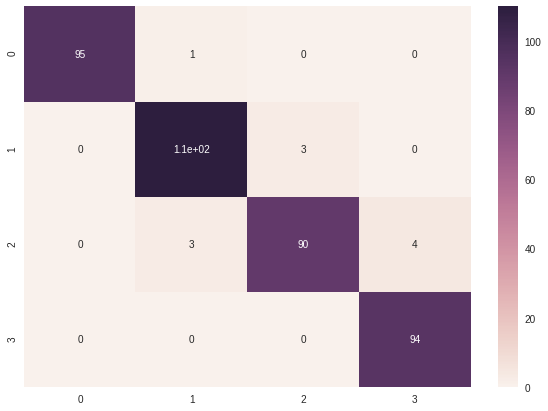

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [0]:
data_test=pd.read_csv('test.csv')

In [0]:
data_test=data_test.drop('id',axis=1)

In [0]:
predicted_price=clf.predict(data_test)

In [0]:
data_test['price_range']=predicted_price

In [0]:
submission = pd.DataFrame(predicted_price)

In [18]:
submission

0
0    3
1    3
2    2
3    3
4    1
5    3
6    3
7    1
8    3
9    0
10   3
11   3
12   0
13   0
14   2
15   0
16   2
17   1
18   3
19   2
20   1
21   3
22   1
23   1
24   3
25   0
26   2
27   0
28   3
29   0
..  ..
970  2
971  1
972  2
973  1
974  3
975  1
976  1
977  3
978  0
979  1
980  0
981  0
982  3
983  3
984  2
985  0
986  0
987  0
988  0
989  3
990  2
991  3
992  3
993  0
994  0
995  2
996  1
997  0
998  2
999  2

[1000 rows x 1 columns]

In [0]:
submission.to_csv('result.csv')

In [0]:
files.download('result.csv')

In [22]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
    scoretrain = clf.score(X_train,y_train)
    scoretest  = clf.score(X_test,y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.991875 , Test Score: 0.977500 

Linear SVM value of C:3, training score :0.987500 , Test Score: 0.972500 

Linear SVM value of C:5, training score :0.987500 , Test Score: 0.972500 

Linear SVM value of C:10, training score :0.984375 , Test Score: 0.972500 

Linear SVM value of C:40, training score :0.985625 , Test Score: 0.972500 

Linear SVM value of C:60, training score :0.985000 , Test Score: 0.972500 

Linear SVM value of C:80, training score :0.985000 , Test Score: 0.972500 

Linear SVM value of C:100, training score :0.985000 , Test Score: 0.972500 



In [0]:
clf = SVC(kernel='linear',C=100).fit(X_train,y_train)
scoretrain = clf.score(X_test,y_test)

In [24]:
print(scoretrain)

0.9725
